In [101]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [102]:
data = pd.read_csv('Iris.csv')

In [103]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [105]:
data.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [106]:
#we don't need id coloumn 
data.drop('Id',axis=1,inplace=True)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X=data.drop(['Species'],axis=1)
Y=data['Species']
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size= 0.33,random_state=1)

In [109]:
#Logistic regression model for categorical data 
from sklearn.linear_model import LogisticRegression

In [110]:
LRmodel=LogisticRegression(max_iter=2000)

In [111]:
LRmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [112]:
LGaccuracy = LRmodel.score(x_test,y_test)*100

In [113]:
print("accruracy = " , LGaccuracy)

accruracy =  98.0


In [114]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier 

In [115]:
RFCmodel=RandomForestClassifier()
RFCmodel.fit(X_train,Y_train)

RandomForestClassifier()

In [116]:
randomFC_accuracy = RFCmodel.score(x_test,y_test)*100

In [117]:
print("Accuracy = ",randomFC_accuracy)

Accuracy =  96.0


In [118]:
#K-NN Model
from sklearn.neighbors import KNeighborsClassifier 

In [119]:
KNNmodel=KNeighborsClassifier()
KNNmodel.fit(X_train,Y_train)

KNeighborsClassifier()

In [120]:
KNNaccuracy= KNNmodel.score(x_test,y_test)*100

In [121]:
print("accuracy = ",KNNaccuracy)

accuracy =  98.0


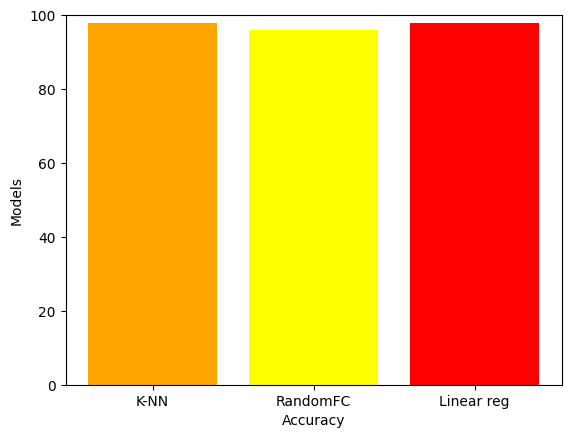

In [122]:
#comparing accuracies   
X = ['K-NN','RandomFC','Linear reg']
Y = [KNNaccuracy,randomFC_accuracy,LGaccuracy]
plt.ylim([0,100])
plt.bar(X,Y, color = ['Orange','Yellow','Red'])
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

In [123]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [124]:
y1 = LRmodel.predict(x_test)
y2 = RFCmodel.predict(x_test)
y3 = KNNmodel.predict(x_test)
matrix1 = confusion_matrix(y_test, y1)
matrix2 = confusion_matrix(y_test, y2)
matrix3 = confusion_matrix(y_test, y3)

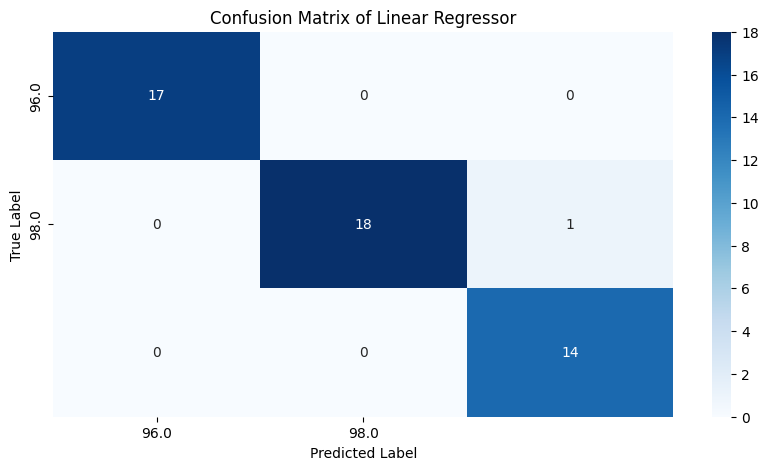

In [125]:
#Confusion Matrix for Linear Regressor
plt.figure(figsize=(10,5))
sb.heatmap(matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Linear Regressor')
plt.show()

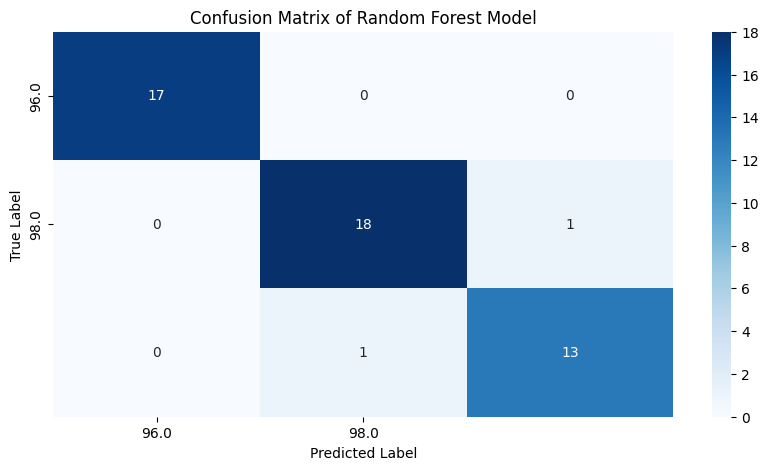

In [126]:
#Confusion Matrix for Random Forest Model
plt.figure(figsize=(10,5))
sb.heatmap(matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

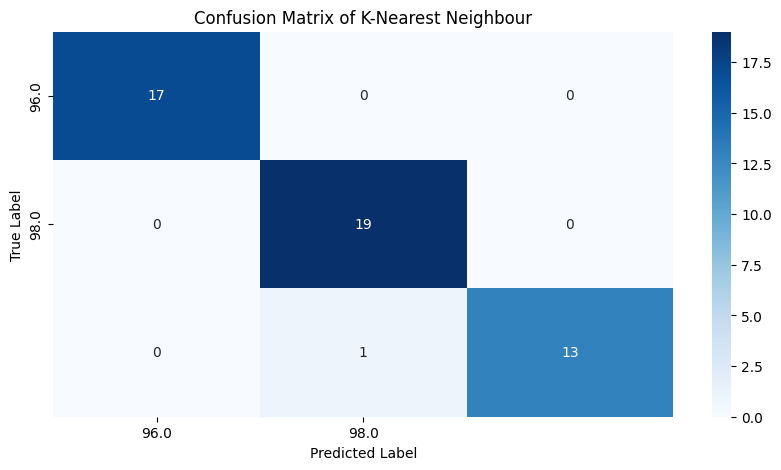

In [127]:
#Confusion Matrix for K-Nearest Neighbour
plt.figure(figsize=(10,5))
sb.heatmap(matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of K-Nearest Neighbour')
plt.show()